In [2]:
import numpy as np 
import matplotlib.pyplot as plt
def PCA(X, d):
    '''
    Inputs:
        X: (p, n) p is #features, n is #data points
        d: number of principal components to keep
    Outputs:
        V: (p, d)
        X_reduced: (d, n)
    '''
    X_bar = X - X.mean(axis = 1, keepdims = True)
    U, s, V = np.linalg.svd(X_bar)
    X_reduced = U[:, :d].T @ X_bar
    return U[:, :d], X_reduced, s, V

In [36]:

'''
create a 2D normal dataset with 200 samples and 2 features,
where the data points are centered at (10, 10) and
have a rotation of 60 degrees
'''
p = 2
n = 200
rotation = np.array([[np.cos(np.pi/3), -np.sin(np.pi/3)], [np.sin(np.pi/3), np.cos(np.pi/3)]])
scaling = np.array([[1, 0], [0, 0.2]])
x = np.random.randn(p, n) + 5
x_scale = scaling.dot(x)  # n samples, p features
x_rot_scale = rotation.dot(x_scale)

U, S, Vh = np.linalg.svd(x_rot_scale, full_matrices=True)

x_bar = x_rot_scale.mean(axis = 1, keepdims=True)
pca_directions, _, _, _ = PCA(x_rot_scale - x_bar, 2)

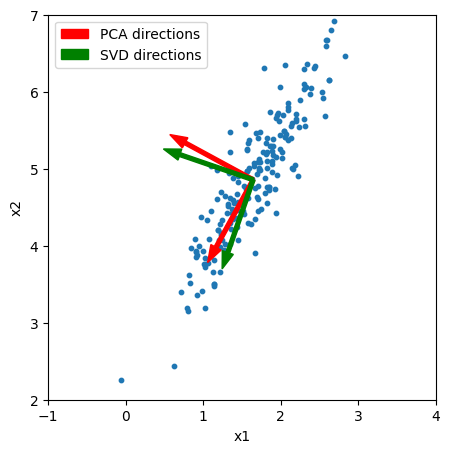

In [41]:

plt.figure(figsize = (5, 5))
plt.xlim(-1, 4)
plt.ylim(2, 7)
plt.scatter(x_rot_scale[0, :], x_rot_scale[1, :], s = 10)
plt.arrow(x_bar[0,0], x_bar[1, 0], pca_directions[0, 0], pca_directions[1, 0], width = 0.05, color = 'r')
plt.arrow(x_bar[0,0], x_bar[1, 0], pca_directions[0, 1], pca_directions[1, 1], width = 0.05, color = 'r', label = 'PCA directions')

plt.arrow(x_bar[0,0], x_bar[1, 0], U[0, 0], U[1, 0], width = 0.05, color = 'g')
plt.arrow(x_bar[0,0], x_bar[1, 0], U[0, 1], U[1, 1], width = 0.05, color = 'g', label = 'SVD directions')

plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')

plt.savefig('./HW1_Q2.png')

plt.show()


In [5]:
U.shape, S.shape, Vh.shape

((2, 2), (2,), (200, 200))